In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [115]:
data = pd.read_csv('data/Clustering_test1', names=['x', 'y'], delim_whitespace=True)

In [116]:
data

,x,y
0,34.703631,40.072185
1,8.619043,63.862177
2,68.702456,27.786891
3,76.054682,32.726977
4,72.794031,42.936803
5,80.890805,11.142518
6,25.438462,54.834554
7,75.970898,18.204605
8,18.781844,48.700138
9,67.186360,26.648939


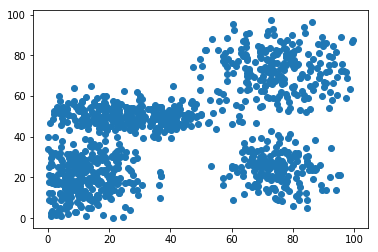

In [117]:
plt.scatter(
   data['x'], 
   data['y']
)

In [118]:
eps = 0.1
MinPts = 5

In [119]:
ptses = []
dist = euclidean_distances(data)

In [120]:
len(dist)

1029

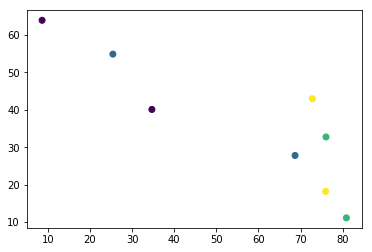

In [121]:
for row in dist:
    density = numpy.sum(row < eps)
    pts = 0;
    if density > MinPts:
        pts = 1
    elif density > 1 :
        pts = 2
    else:
        pts = 0
    ptses.append(pts)
    
corePoints = data[pandas.Series(ptses) != 0]
coreDist = euclidean_distances(corePoints)
cluster = dict();
i = 0;
for row in coreDist: 
    cluster[i] = numpy.where(row<eps)[0]
    i = i + 1

for i in range(len(cluster)):
    for j in range(len(cluster)):
        if len(set(cluster[j]) & set(cluster[i]))>0 and i!=j:
            cluster[i] = list(set(cluster[i]) | set(cluster[j]))
            cluster[j] = list();

result = dict();
j = 0
for i in range(len(cluster)):
    if len(cluster[i])>0:
        result[j] = cluster[i]
        j = j + 1

for i in range(len(result)):
    for j in result[i]:
        data.at[j, 'type'] = i

plt.scatter(
   data['x'], 
   data['y'],
   c=data['type']
)

In [122]:
data[:100]

,x,y,type
0,34.703631,40.072185,0.0
1,8.619043,63.862177,0.0
2,68.702456,27.786891,1.0
3,76.054682,32.726977,2.0
4,72.794031,42.936803,3.0
5,80.890805,11.142518,2.0
6,25.438462,54.834554,1.0
7,75.970898,18.204605,3.0
8,18.781844,48.700138,NaN
9,67.186360,26.648939,NaN


In [123]:
max(data['type'])

3.0

In [124]:
coreDist

array([[0.00000000e+00, 9.25585762e-02, 4.04716901e+01, 4.82517313e+01,
        3.89602473e+01, 4.81874757e+01, 4.04209657e+01, 3.89345808e+01],
       [9.25585762e-02, 0.00000000e+00, 4.04735703e+01, 4.82199295e+01,
        3.89200713e+01, 4.81557371e+01, 4.04229922e+01, 3.88943896e+01],
       [4.04716901e+01, 4.04735703e+01, 0.00000000e+00, 1.80547610e+01,
        1.85241172e+01, 1.79888733e+01, 8.15603466e-02, 1.85272162e+01],
       [4.82517313e+01, 4.82199295e+01, 1.80547610e+01, 0.00000000e+00,
        1.02240296e+01, 7.31810556e-02, 1.81292615e+01, 1.02500788e+01],
       [3.89602473e+01, 3.89200713e+01, 1.85241172e+01, 1.02240296e+01,
        0.00000000e+00, 1.01777018e+01, 1.85692623e+01, 2.66397358e-02],
       [4.81874757e+01, 4.81557371e+01, 1.79888733e+01, 7.31810556e-02,
        1.01777018e+01, 0.00000000e+00, 1.80633153e+01, 1.02037197e+01],
       [4.04209657e+01, 4.04229922e+01, 8.15603466e-02, 1.81292615e+01,
        1.85692623e+01, 1.80633153e+01, 0.00000000e+00, 1.